# ARC DSL Demo

This notebook demonstrates the ARC DSL system on a simple task.

In [ ]:
# Import necessary modules
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add the parent directory to the path
sys.path.append(str(Path.cwd().parent.parent))

# Import our DSL modules with the correct paths
from dsl.dsl_utils.primitives import ALL_PRIMITIVES
from dsl.dsl_utils.types import Grid
from dsl.search.enumerator import iter_deepening
from dsl.search.verifier import verify, evaluate_program
from dsl.io.loader import load_task, load_solution, load_train_pairs, load_test_input
from dsl.io.visualizer import visualize_task

## Load Task 0a1d4ef5

This is a simple task from the MIT-easy dataset.

In [14]:
# Load the task
task_id = "0a1d4ef5"
task = load_task(task_id)

# Extract training pairs
train_pairs = load_train_pairs(task)
test_input = load_test_input(task)

# Try to load the solution
solution = None
try:
    solution_grid = load_solution(task_id)
    solution = Grid(solution_grid)
except Exception as e:
    print(f"Warning: Could not load solution: {e}")

## Visualize Training Examples

Let's look at the training examples to understand the task.

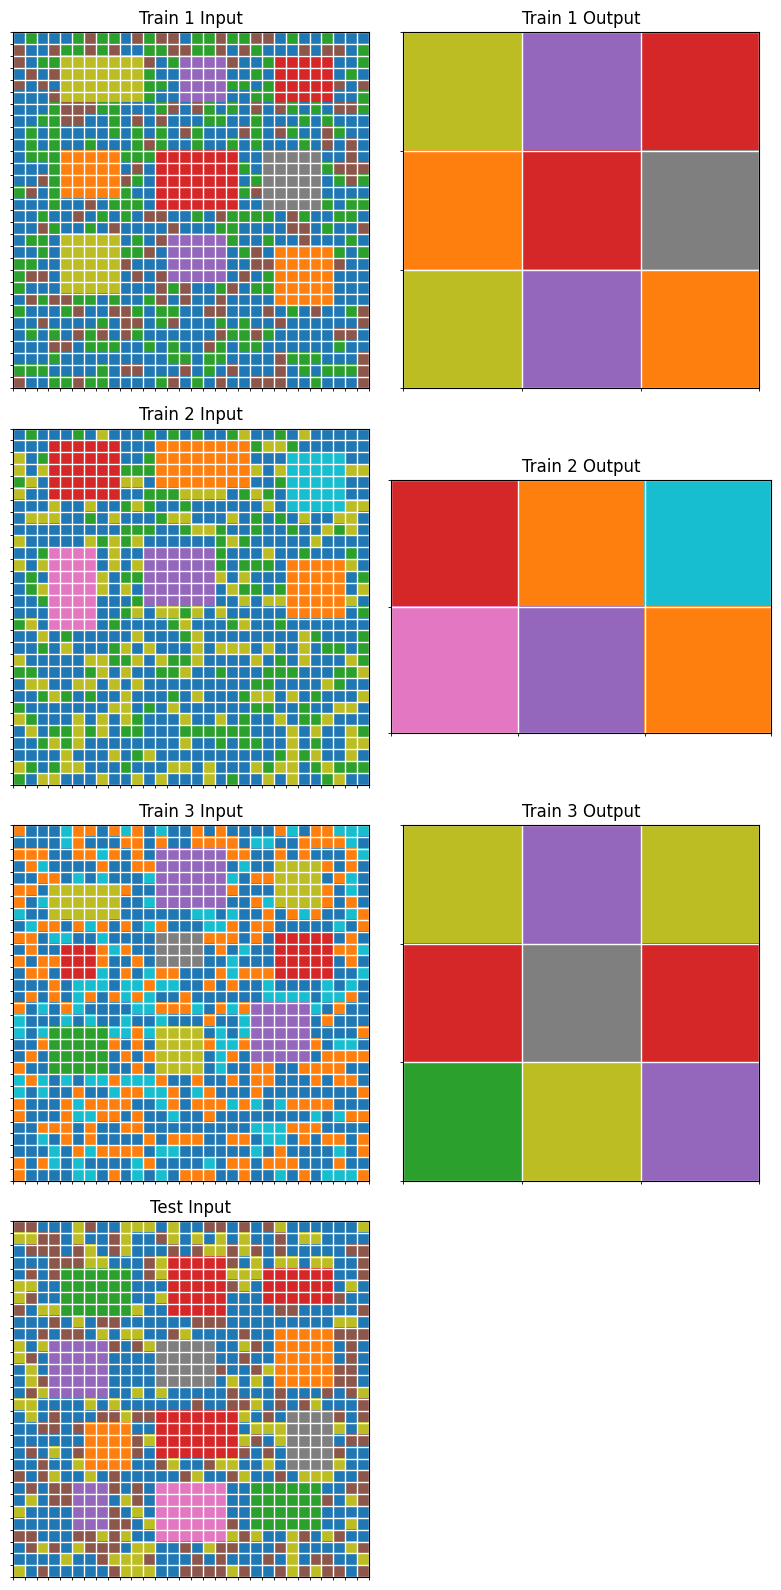

In [15]:
# Visualize the task without predictions
fig = visualize_task(task)
plt.show()

## Run the Solver

Now let's run our DSL solver to find a program that solves this task.

In [16]:
# Get shapes for heuristics
input_shape = train_pairs[0][0].shape
output_shape = train_pairs[0][1].shape

print(f"Input shape: {input_shape}, Output shape: {output_shape}")
print(f"Searching for programs with max depth 4...")

# Start the search
start_time = time.time()
found_solution = False
valid_program = None
prediction = None

# Generate and verify programs
for program in iter_deepening(ALL_PRIMITIVES, 4, input_shape, output_shape, 30.0):
    if verify(program, train_pairs):
        valid_program = program
        found_solution = True
        print(f"Found valid program: {program}")
        
        # Generate prediction for the test input
        prediction = evaluate_program(program, test_input)
        if prediction is not None:
            print(f"Generated prediction for test input")
        else:
            print(f"Failed to generate prediction for test input")
        
        break

elapsed_time = time.time() - start_time
print(f"Search completed in {elapsed_time:.2f} seconds")

Input shape: (30, 30), Output shape: (3, 3)
Searching for programs with max depth 4...
Search completed in 1.14 seconds


## Visualize Results

Let's visualize the results of our solver.

In [17]:
if found_solution:
    # Check if the prediction matches the solution
    if solution is not None and prediction is not None:
        if prediction == solution:
            print("Prediction matches the solution!")
        else:
            print("Prediction does not match the solution")
    
    # Visualize the results
    fig = visualize_task(task, prediction, solution)
    plt.show()
else:
    print("No solution found")

No solution found


## Timing Analysis

Let's measure how long it takes to run the solver on this task.

In [ ]:
# Run the solver multiple times to get an average time
n_runs = 3
times = []

for i in range(n_runs):
    start_time = time.time()
    
    # Generate and verify programs
    for program in iter_deepening(ALL_PRIMITIVES, 4, input_shape, output_shape, 15.0):
        if verify(program, train_pairs):
            break
    
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    print(f"Run {i+1}: {elapsed_time:.2f} seconds")

print(f"Average time: {sum(times) / len(times):.2f} seconds")